In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
from pathlib import *

Create pathlib variable for the data folder.

In [3]:
path = Path('/home/jupyter/Data/Competitions/')

List content of the folder

In [4]:
path.ls()

['test',
 'test.zip',
 'sample_submission.csv.zip',
 'labels.csv.zip',
 'train.zip',
 'train',
 'sample_submission.csv',
 '.ipynb_checkpoints',
 'labels.csv']

Create train & test folder variable using 3.6 pathlib functionality

In [5]:
train = path/'train'
test = path/'test'
csv = path/'labels.csv'

Create list of all the training files from teh train folder.

In [6]:
fnames = get_image_files(train)
fnames[:5]

[PosixPath('/home/jupyter/Data/Competitions/train/3d1efcdf1eaacd8419f95c92f6ad746f.jpg'),
 PosixPath('/home/jupyter/Data/Competitions/train/b7b17e7649e3c85654d9e79411de0730.jpg'),
 PosixPath('/home/jupyter/Data/Competitions/train/3210707d7fc78b83f2394140162d44c8.jpg'),
 PosixPath('/home/jupyter/Data/Competitions/train/f056ee6bc913fba2697dabf37c1c8531.jpg'),
 PosixPath('/home/jupyter/Data/Competitions/train/cd1d661e9023be9095a28ab1d005b502.jpg')]

In [ ]:
help(get_image_filesge_filesage_files)

In [7]:
len(fnames)
#training examples

10222

For each image capture the size and see how they are distributed

In [8]:
im=array([list(open_image(image).size) for image in fnames])

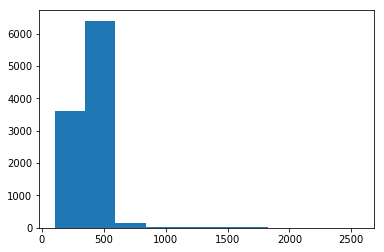

In [9]:
plt.hist(im[:,0]);

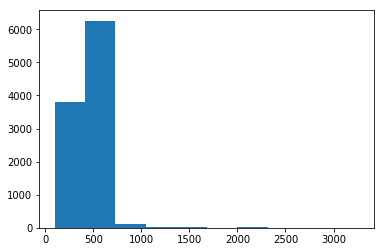

In [10]:
plt.hist(im[:,1]);

Mostly the images are 500 x 500. Though there are some outliers (which can be treated by croping or other mechanism. For this notebook we are not going to treat it.)

Read the labels

In [55]:
labels = pd.read_csv(csv, index_col='id')

In [56]:
labels.head(5)

breed
id                                                
000bec180eb18c7604dcecc8fe0dba07       boston_bull
001513dfcb2ffafc82cccf4d8bbaba97             dingo
001cdf01b096e06d78e9e5112d419397          pekinese
00214f311d5d2247d5dfe4fe24b2303d          bluetick
0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [69]:
#unique breeds
len(pd.unique(labels.breed))

120

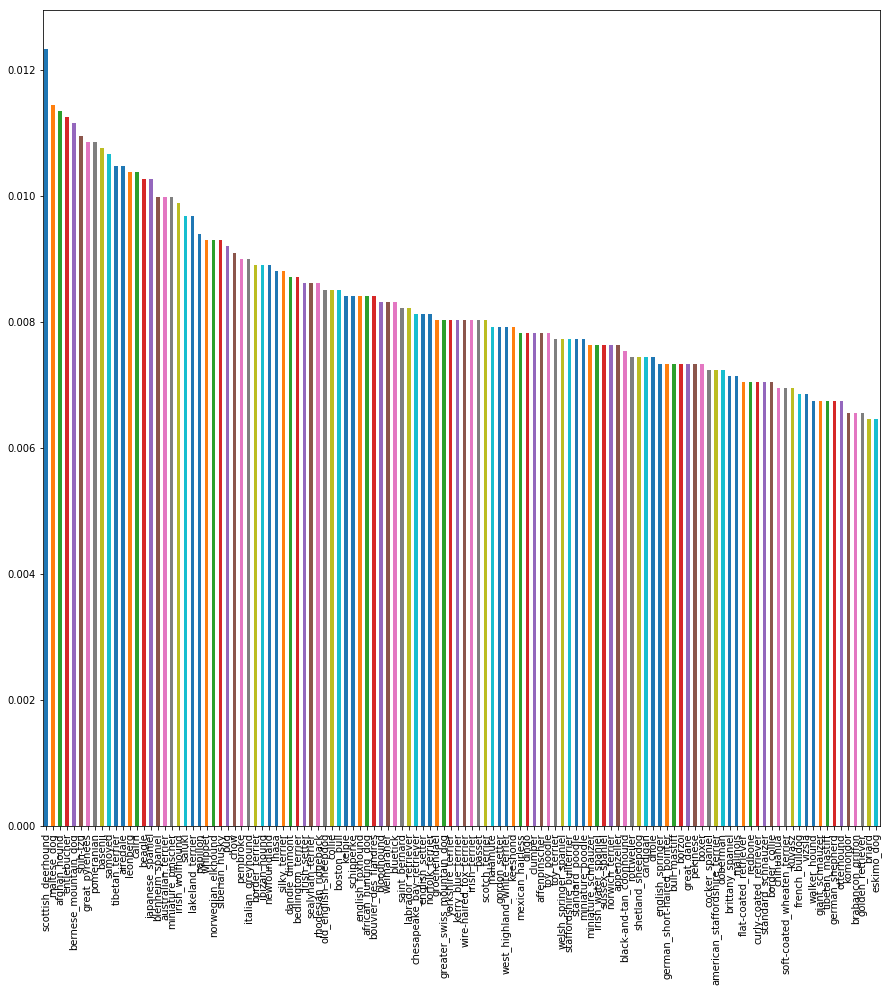

In [65]:
percentage = labels.breed.value_counts()/len(labels)
percentage.plot(kind='bar', x = "Breed", y='Count', figsize=(15,15));

Scotish_deerhound has the max images so we should expect better results but if we see the eskimo_dog being incorrectly categorized we should make some changes to augment the data.

In [71]:
doc(ImageDataBunch)

In [70]:
help(get_transforms)
doc(get_transforms)

Help on function get_transforms in module fastai.vision.transform:

get_transforms(do_flip:bool=True, flip_vert:bool=False, max_rotate:float=10.0, max_zoom:float=1.1, max_lighting:float=0.2, max_warp:float=0.2, p_affine:float=0.75, p_lighting:float=0.75, xtra_tfms:float=None) -> Collection[fastai.vision.image.Transform]
    Utility func to easily create a list of flip, rotate, `zoom`, warp, lighting transforms.



We are creating the data

In [15]:
data = ImageDataBunch.from_csv(train, csv_labels=csv, suffix='.jpg', ds_tfms=get_transforms(), size=224, bs=64)

In [16]:
data.normalize(imagenet_stats)

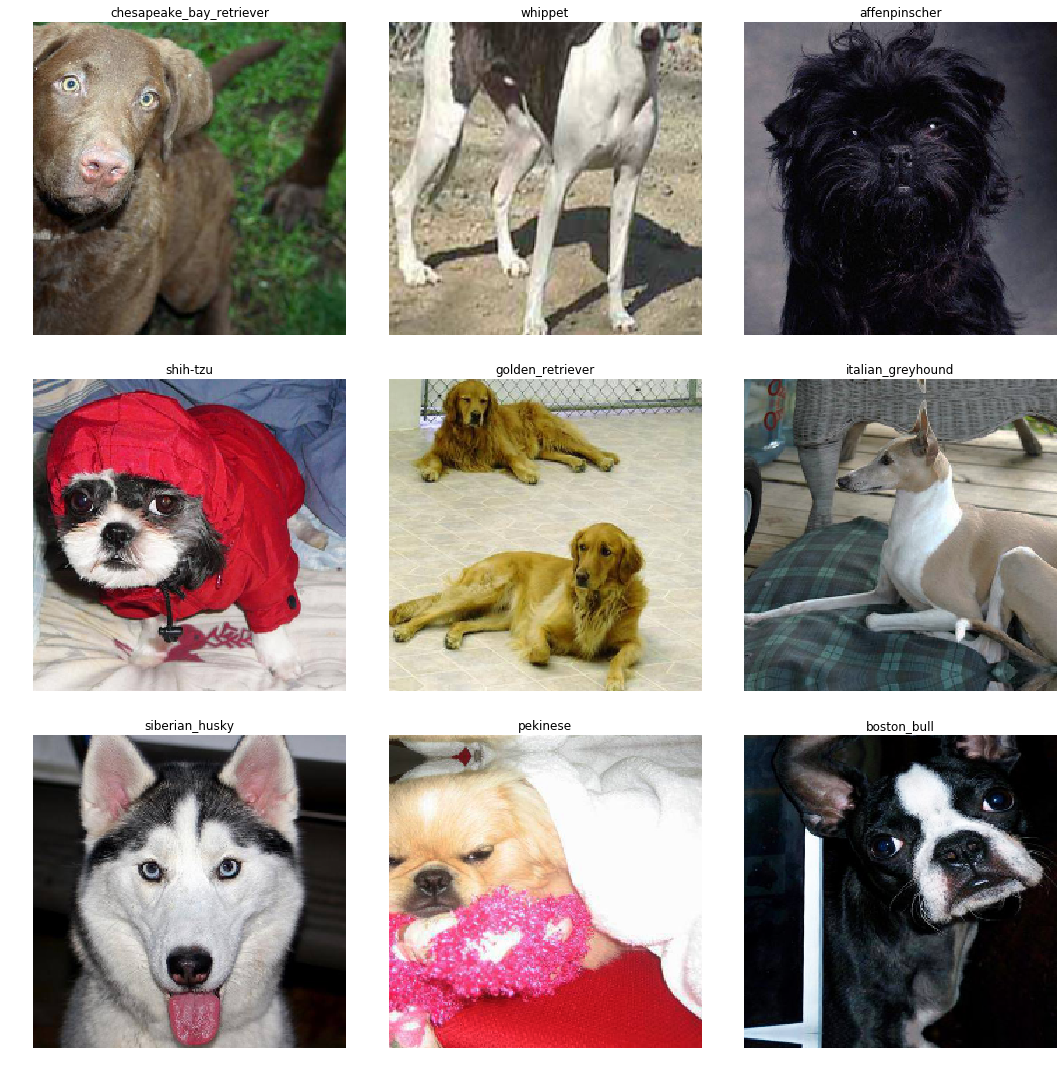

In [17]:
data.show_batch(3, figsize=(15,15))

In [18]:
print(data.classes)

['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever', 'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound', 'shetland_sheepdog', 'walker_hound', 'maltese_dog', 'norfolk_terrier', 'african_hunting_dog', 'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer', 'doberman', 'otterhound', 'standard_schnauzer', 'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn', 'affenpinscher', 'labrador_retriever', 'ibizan_hound', 'english_setter', 'weimaraner', 'giant_schnauzer', 'groenendael', 'dhole', 'toy_poodle', 'border_terrier', 'tibetan_terrier', 'norwegian_elkhound', 'shih-tzu', 'irish_terrier', 'kuvasz', 'german_shepherd', 'greater_swiss_mountain_dog', 'basset', 'australian_terrier', 'schipperke', 'rhodesian_ridgeback', 'irish_setter', 'appenzeller', 'bloodhound', 'samoyed', 'miniature_schnauzer', 'brittany_spaniel', 'kelpie', 'papillon', 'border_collie', 'entlebucher', 'collie', 'malamute', 'welsh_springer_spaniel', 'chihuahua', 'saluki', 'pug', 'malino

In [19]:
print(data.c)

120


Create the Convolutional Learning model with data and using Transfer Learning with resnet34. Consider the error rate as metrics.
Metrics could be accuracy as well.

In [20]:
learn = ConvLearner(data, arch=models.resnet34, metrics=error_rate )

Fit the model with data for 6 cycles. Explain Cycle.

In [21]:
learn.fit_one_cycle(6)

Total time: 04:29
epoch  train loss  valid loss  error_rate
1      2.551249    1.043391    0.256461    (00:44)
2      1.104521    0.676300    0.207753    (00:43)
3      0.797594    0.585164    0.185388    (00:44)
4      0.651558    0.539389    0.168489    (00:45)
5      0.486826    0.532230    0.169980    (00:45)
6      0.433628    0.514807    0.166004    (00:45)



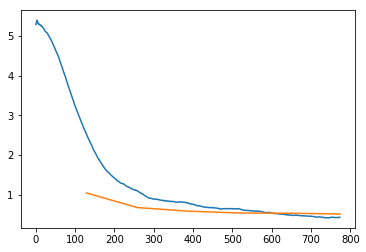

In [22]:
learn.recorder.plot_losses()

In [23]:
learn.save('Dog-breed-34')

In [24]:
interpret = ClassificationInterpretation.from_learner(learn)

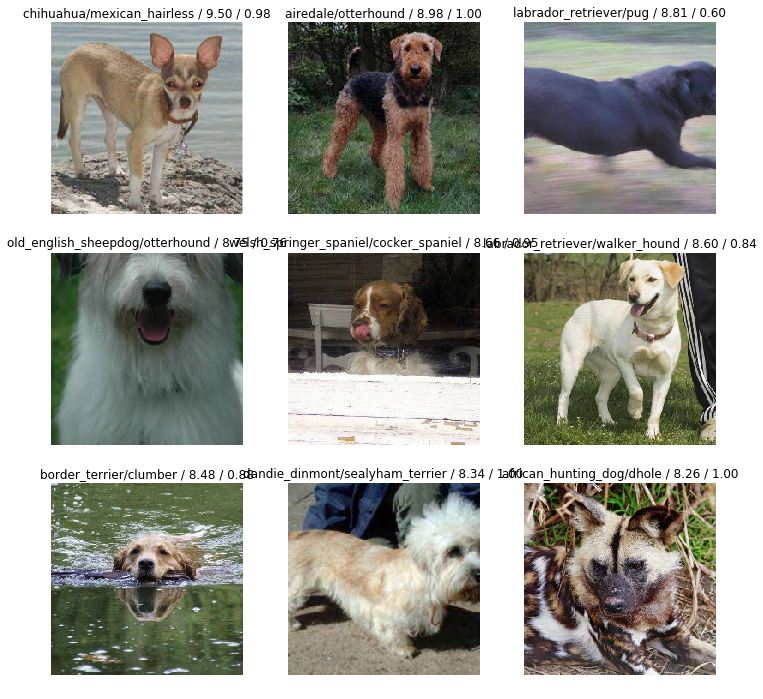

In [25]:
interpret.plot_top_losses(9, figsize=(12,12))

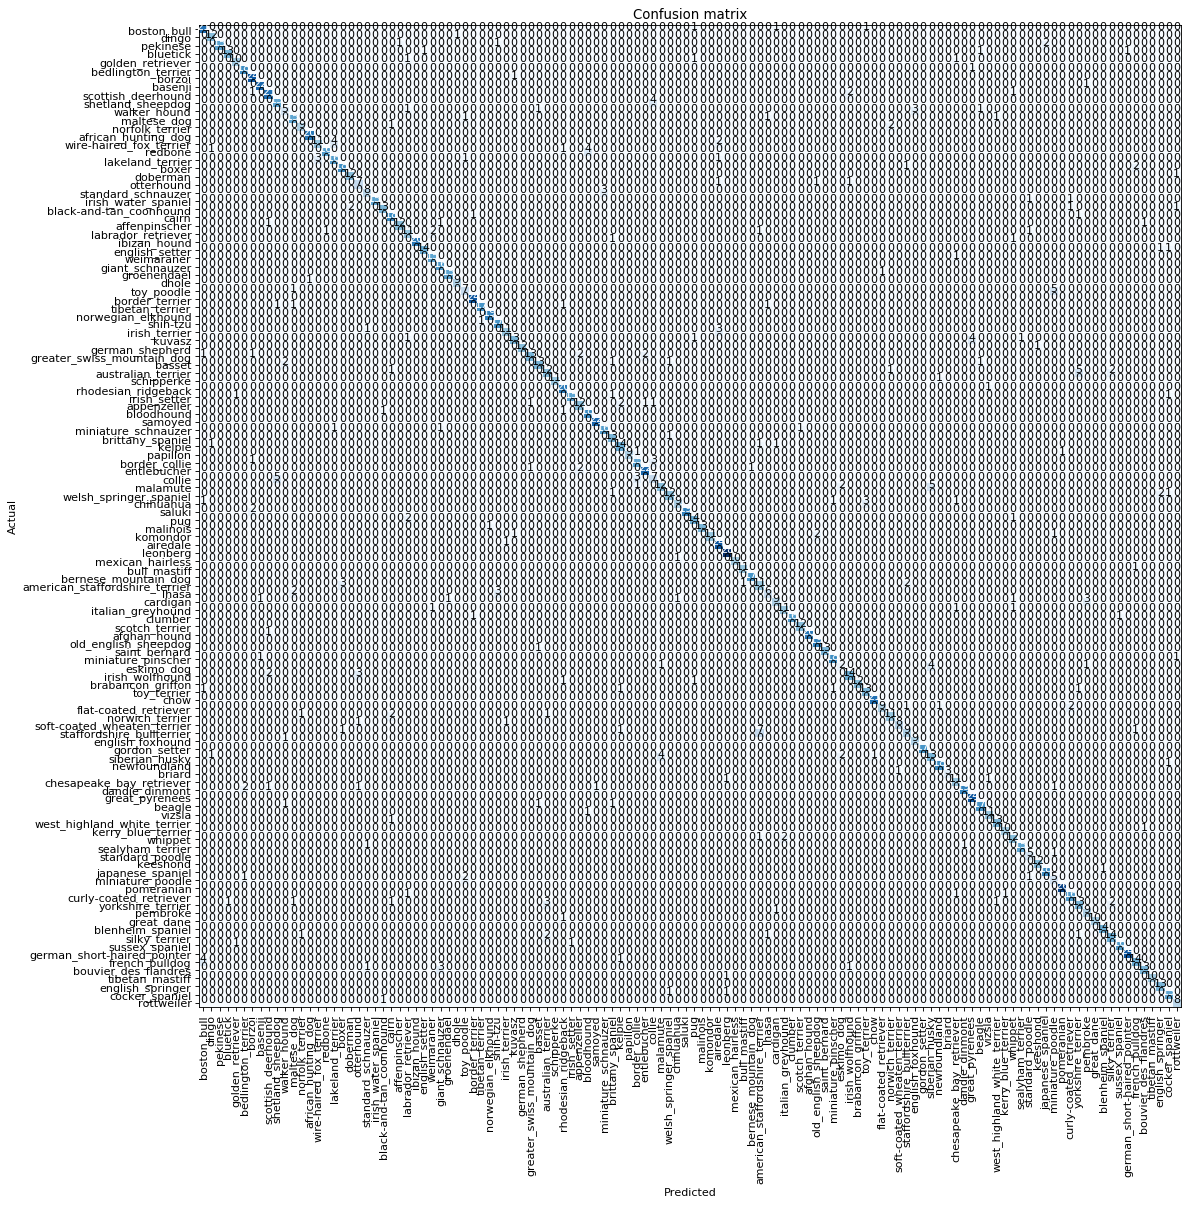

In [26]:
interpret.plot_confusion_matrix(figsize=(15,15), dpi=80)

In [27]:
interpret.most_confused(min_val=2)

[('staffordshire_bullterrier', 'american_staffordshire_terrier', 7),
 ('toy_poodle', 'miniature_poodle', 5),
 ('australian_terrier', 'yorkshire_terrier', 5),
 ('collie', 'shetland_sheepdog', 5),
 ('malamute', 'siberian_husky', 5),
 ('shetland_sheepdog', 'collie', 4),
 ('wire-haired_fox_terrier', 'lakeland_terrier', 4),
 ('redbone', 'bloodhound', 4),
 ('kuvasz', 'great_pyrenees', 4),
 ('eskimo_dog', 'siberian_husky', 4),
 ('siberian_husky', 'malamute', 4),
 ('french_bulldog', 'boston_bull', 4),
 ('walker_hound', 'english_foxhound', 3),
 ('lakeland_terrier', 'wire-haired_fox_terrier', 3),
 ('standard_schnauzer', 'miniature_schnauzer', 3),
 ('irish_terrier', 'airedale', 3),
 ('border_collie', 'collie', 3),
 ('collie', 'border_collie', 3),
 ('chihuahua', 'toy_terrier', 3),
 ('american_staffordshire_terrier', 'boxer', 3),
 ('lhasa', 'shih-tzu', 3),
 ('cardigan', 'pembroke', 3),
 ('irish_wolfhound', 'otterhound', 3),
 ('yorkshire_terrier', 'australian_terrier', 3),
 ('bouvier_des_flandres', 

Not executing this as flip was not giving good results.
#data = ImageDataBunch.from_csv(train, csv_labels=csv, suffix='.jpg', ds_tfms=get_transforms(do_flip=True), size=224, bs=64)
#data.normalize(imagenet_stats)
#data.show_batch(3, figsize=(15,15))

In [28]:
learn.unfreeze()

In [29]:
learn.fit_one_cycle(1)

Total time: 00:56
epoch  train loss  valid loss  error_rate
1      2.092938    1.410135    0.394135    (00:56)



In [30]:
learn.load('Dog-breed-34')

In [33]:
learn.lr_find()

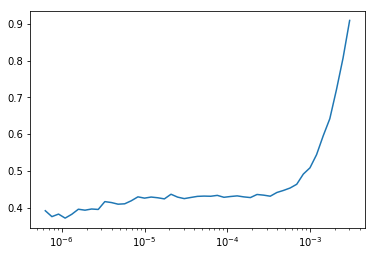

In [34]:
learn.recorder.plot()

In [35]:
learn.unfreeze()

In [36]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

Total time: 01:53
epoch  train loss  valid loss  error_rate
1      0.420949    0.521866    0.167992    (00:55)
2      0.391562    0.514126    0.166501    (00:57)



In [37]:
data = ImageDataBunch.from_csv(train, csv_labels=csv, suffix='.jpg', ds_tfms=get_transforms(), size=299, bs=24)
data.normalize(imagenet_stats)

In [38]:
data.train_dl.dl.dataset.ds.y

array([ 0,  1,  2, ...,  6, 77, 92])

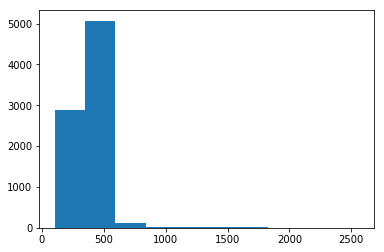

In [39]:
train_im=array([list(open_image(image).size) for image in data.train_dl.dl.dataset.ds.x])
plt.hist(train_im[:,0]);

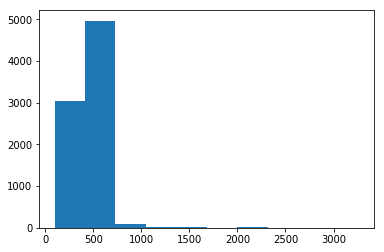

In [40]:
plt.hist(train_im[:,1]);

In [41]:
learn2 = ConvLearner(data, arch=models.resnet50, metrics=error_rate)

In [42]:
learn2.fit_one_cycle(5)

Total time: 13:01
epoch  train loss  valid loss  error_rate
1      1.153016    0.562673    0.174725    (02:44)
2      0.950586    0.585018    0.176640    (02:33)
3      0.753453    0.484552    0.150311    (02:34)
4      0.496086    0.405685    0.127334    (02:33)
5      0.348496    0.388079    0.124461    (02:34)



In [ ]:
learn2.save('Dog-Breed-50')

In [43]:
interpret50 = ClassificationInterpretation.from_learner(learn2)

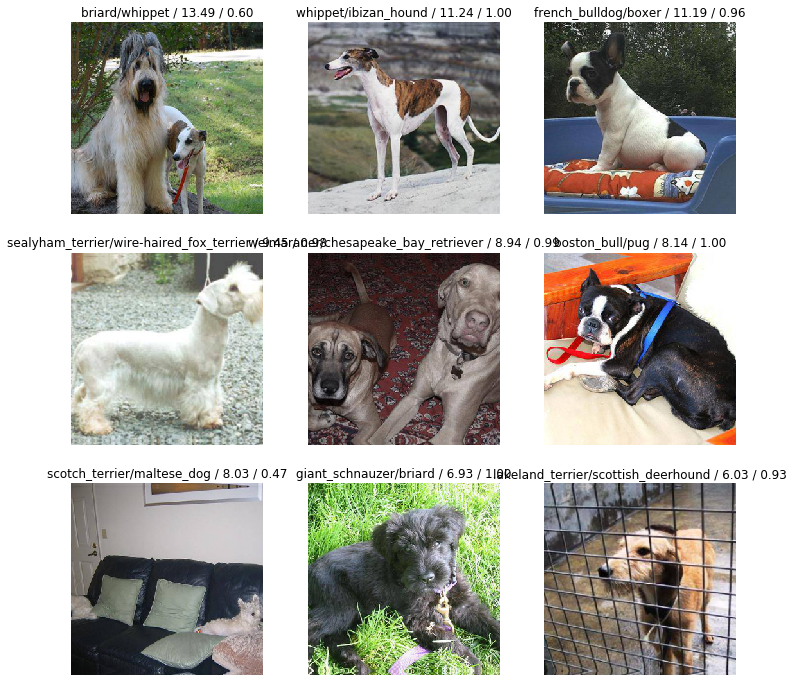

In [44]:
interpret50.plot_top_losses(9, figsize=(12,12))

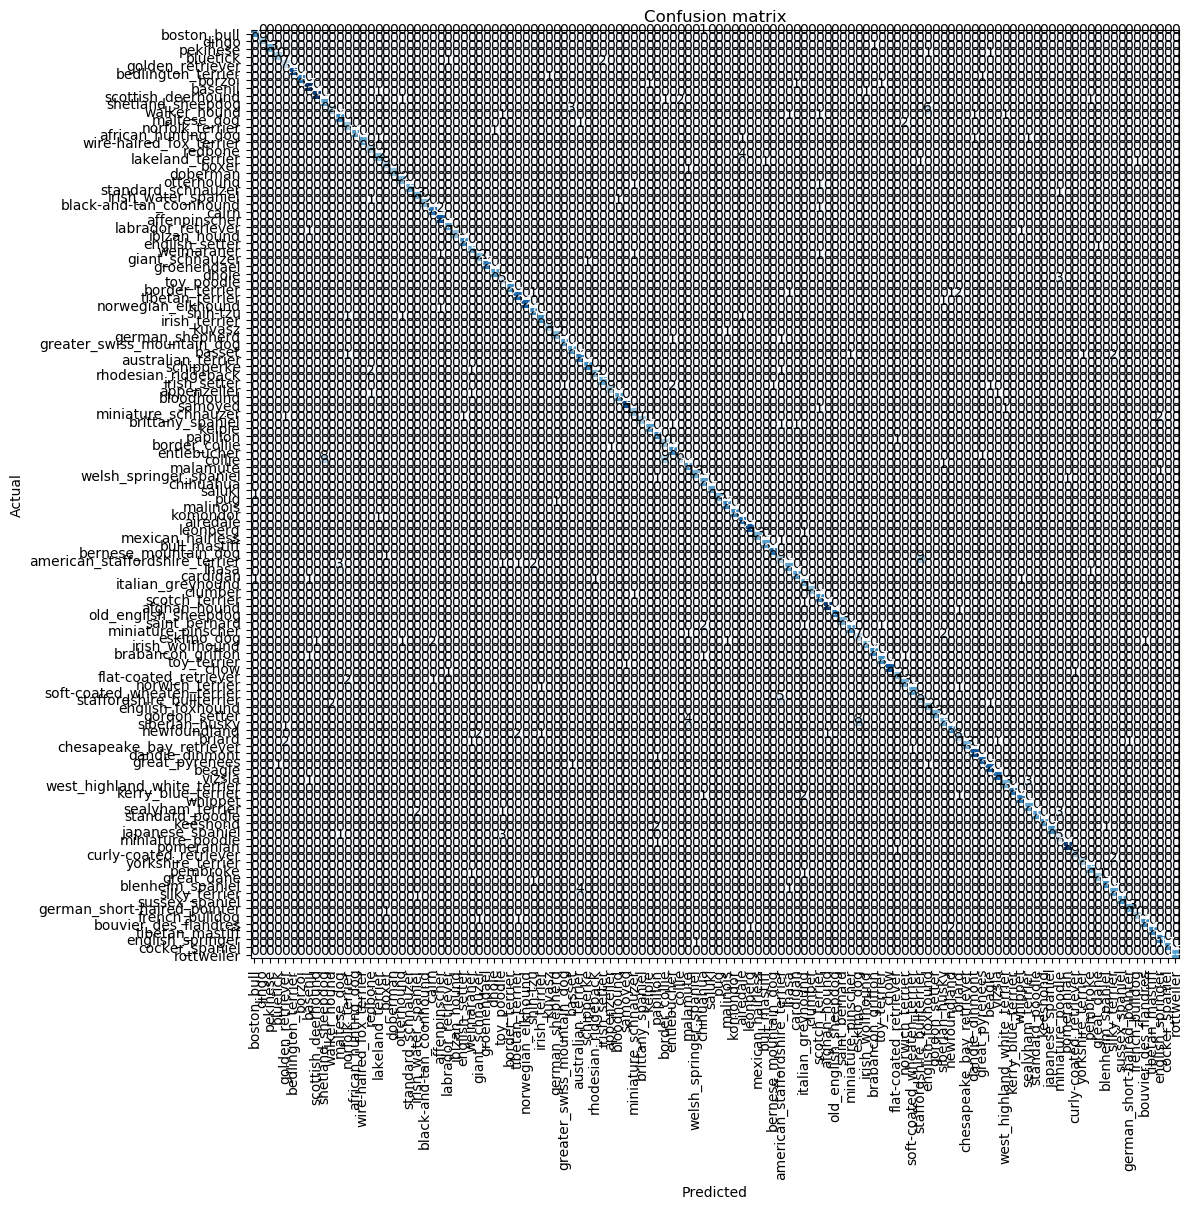

In [45]:
interpret50.plot_confusion_matrix(figsize=(12,12), dpi=100)

In [46]:
interpret50.most_confused()

[('collie', 'border_collie', 9),
 ('american_staffordshire_terrier', 'staffordshire_bullterrier', 9),
 ('collie', 'shetland_sheepdog', 8),
 ('siberian_husky', 'eskimo_dog', 8),
 ('walker_hound', 'english_foxhound', 6),
 ('staffordshire_bullterrier', 'american_staffordshire_terrier', 5),
 ('lakeland_terrier', 'airedale', 4),
 ('siberian_husky', 'malamute', 4),
 ('silky_terrier', 'australian_terrier', 4),
 ('walker_hound', 'basset', 3),
 ('toy_poodle', 'miniature_poodle', 3),
 ('lhasa', 'maltese_dog', 3),
 ('west_highland_white_terrier', 'sealyham_terrier', 3),
 ('standard_poodle', 'miniature_poodle', 3),
 ('miniature_poodle', 'toy_poodle', 3),
 ('golden_retriever', 'irish_setter', 2),
 ('shetland_sheepdog', 'collie', 2),
 ('norfolk_terrier', 'norwich_terrier', 2),
 ('cairn', 'affenpinscher', 2),
 ('tibetan_terrier', 'briard', 2),
 ('australian_terrier', 'silky_terrier', 2),
 ('rhodesian_ridgeback', 'redbone', 2),
 ('appenzeller', 'entlebucher', 2),
 ('brittany_spaniel', 'english_springe

In [47]:
learn2.unfreeze()

In [48]:
learn2.fit_one_cycle(1)

Total time: 03:25
epoch  train loss  valid loss  error_rate
1      2.361538    1.544545    0.432743    (03:25)



In [49]:
learn2.load('Dog-Breed-50')

In [50]:
learn2.lr_find()

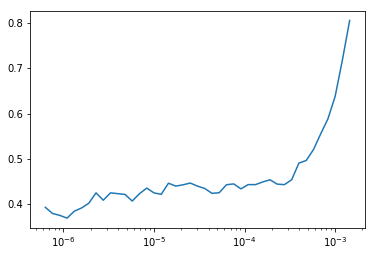

In [51]:
learn2.recorder.plot()

In [53]:
learn2.fit_one_cycle(2, max_lr=slice(10e-7,10e-4))

Total time: 06:49
epoch  train loss  valid loss  error_rate
1      0.439709    0.245214    0.085208    (03:24)
2      0.288075    0.198762    0.067496    (03:25)



With more training this might increase. For the 1st draft will keep it to 7% error.